In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

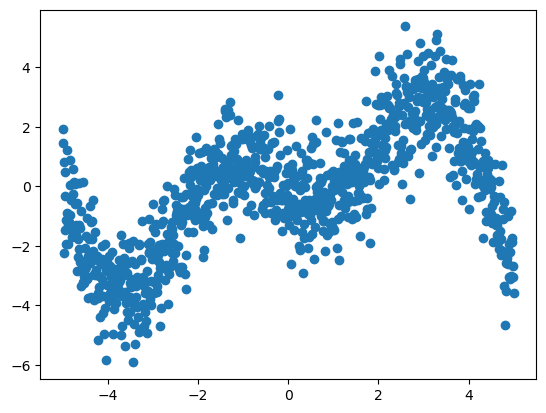

torch.Size([1000])
torch.Size([1000])


In [2]:
# This sets a variable for randomization which makes our results reproducible
torch.manual_seed(42)
def get_target_function(x):
    # True function is x * sin(x + 5) with Gaussian noise
    return x * torch.sin(x + 5)

x = torch.linspace(-5, 5, 1000)
y = get_target_function(x) + torch.normal(0, 1, size=x.size())
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

X_train = x.reshape(-1, 1)
y_train = y.reshape(-1, 1)

print(x.shape)
print(y.shape)

In [7]:
# Define the neural network
class DropoutNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob):
        super(DropoutNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_prob)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [8]:
# Instantiate the model, loss function, and optimizer
input_size = 1
hidden_size = 100
output_size = 1
dropout_prob = 0
model = DropoutNet(input_size, hidden_size, output_size, dropout_prob)


In [13]:
# Training loop
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
num_epochs = 2000
model.train()
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [500/2000], Loss: 0.9931
Epoch [1000/2000], Loss: 0.9918
Epoch [1500/2000], Loss: 0.9902
Epoch [2000/2000], Loss: 0.9889


In [10]:
# Prediction
model.train()  # Set to training mode to enable dropout during inference
with torch.no_grad():
    outputs = torch.cat([model(X_train) for _ in range(100)], dim=1)
    mean_prediction = outputs.mean(dim=1).numpy()
    std_prediction = outputs.std(dim=1).numpy()

In [11]:
sorting_indexes_X = np.argsort(X_train.reshape(1, -1)[0])
sorted_X_train = X_train[sorting_indexes_X]
sorted_y_train = y_train[sorting_indexes_X]
sorted_mean_prediction = mean_prediction[sorting_indexes_X]
sorted_std_prediction = std_prediction[sorting_indexes_X]

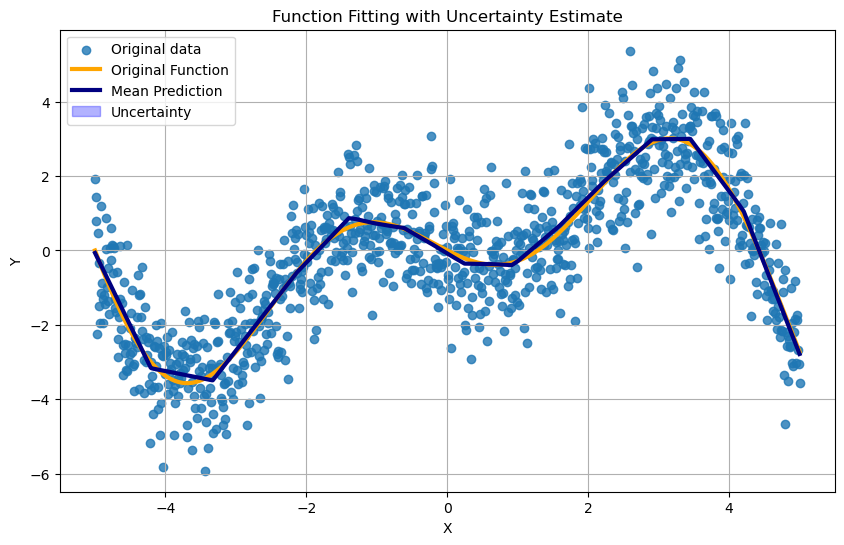

In [12]:

plt.figure(figsize=(10, 6))

plt.scatter(sorted_X_train.numpy().flatten(), sorted_y_train.numpy(),alpha=0.8, label='Original data')
plt.plot(X_train, get_target_function(X_train), color="orange", lw=3, label="Original Function")
plt.plot(sorted_X_train.numpy().flatten(), sorted_mean_prediction, color="navy", lw=3, label="Mean Prediction")
#plt.plot(sorted_X_train.numpy().flatten(), sorted_mean_prediction + 2 * sorted_std_prediction, color='green', label='Upper 95% CI')
#plt.plot(sorted_X_train.numpy().flatten(), sorted_mean_prediction - 2 * sorted_std_prediction, color='yellow', label='Lower 95% CI')
plt.fill_between(sorted_X_train.numpy().flatten(), sorted_mean_prediction - 2 * sorted_std_prediction,
                 sorted_mean_prediction + 2 * sorted_std_prediction, color='blue', alpha=0.3, label='Uncertainty')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Function Fitting with Uncertainty Estimate')
plt.legend()
plt.grid(True)
plt.show()

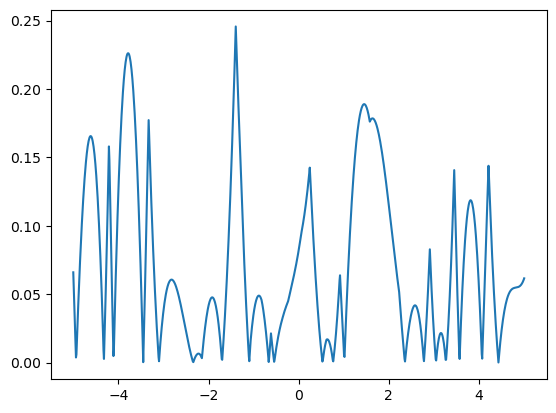

In [53]:
plt.plot(np.array(X_train), np.abs(get_target_function(X_train) - sorted_mean_prediction.reshape(-1, 1)))

In [54]:
np.mean(np.array((np.abs(get_target_function(X_train) - sorted_mean_prediction.reshape(-1, 1))).reshape(1, -1)[0]))

0.0715482

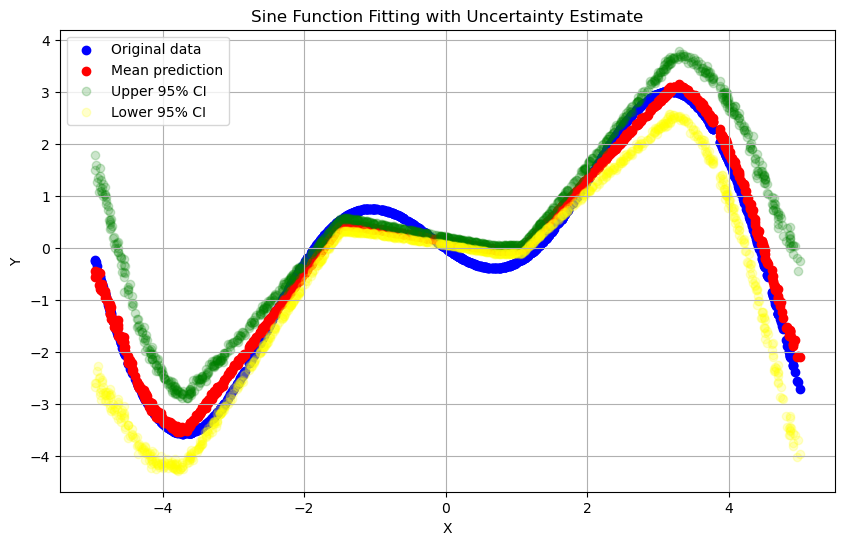

In [7]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_train.numpy(), y_train.numpy(), color='blue', label='Original data')
plt.scatter(X_train.numpy(), mean_prediction, color='red', label='Mean prediction')
plt.scatter(X_train.numpy().flatten(), mean_prediction + 2 * std_prediction, color='green', alpha=0.2, label='Upper 95% CI')
plt.scatter(X_train.numpy().flatten(), mean_prediction - 2 * std_prediction, color='yellow', alpha=0.2, label='Lower 95% CI')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sine Function Fitting with Uncertainty Estimate')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
X_train = X_train.flatten()
mean_prediction = mean_prediction.flatten()
sorting_indexes = np.argsort(X_train)
lower_bound = mean_prediction - 2 * std_prediction
lower_bound = lower_bound.flatten()
upper_bound = mean_prediction + 2 * std_prediction
upper_bound = upper_bound.flatten()
X_train = X_train[sorting_indexes]
mean_prediction = mean_prediction[sorting_indexes]
lower_bound = lower_bound[sorting_indexes]
upper_bound = upper_bound[sorting_indexes]

In [9]:
print(np.mean(mean_prediction))
print(torch.mean(X_train))

-0.15160522
tensor(-0.0974)


TypeError: plot() got an unexpected keyword argument 'x'

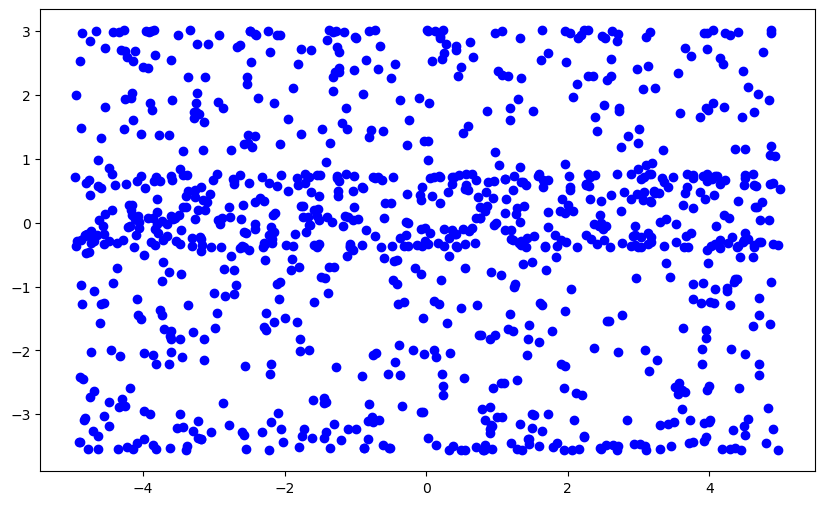

In [10]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_train.numpy(), y_train.numpy(), color='blue', label='Original data')
plt.plot(x=X_train, y=mean_prediction, color='red', label='Prediction')
plt.fill_between(X_train.numpy().flatten(), lower_bound, upper_bound, color='gray', alpha=0.2, label='Uncertainty')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sine Function Fitting with Uncertainty Estimate')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:






# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_train.numpy(), y_train.numpy(), color='blue', label='Original data')
plt.plot(X_train.numpy(), predictions, color='red', label='Prediction')
plt.fill_between(X_train.numpy().flatten(), predictions.flatten() - 2*np.std(predictions), predictions.flatten() + 2*np.std(predictions), color='gray', alpha=0.2, label='Uncertainty')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sine Function Fitting with Uncertainty Estimate')
plt.legend()
plt.grid(True)
plt.show()

Epoch [100/2000], Loss: 0.3025
Epoch [200/2000], Loss: 0.2890
Epoch [300/2000], Loss: 0.2716
Epoch [400/2000], Loss: 0.2831
Epoch [500/2000], Loss: 0.2776
Epoch [600/2000], Loss: 0.2765
Epoch [700/2000], Loss: 0.2740
Epoch [800/2000], Loss: 0.2775
Epoch [900/2000], Loss: 0.2660
Epoch [1000/2000], Loss: 0.2787
Epoch [1100/2000], Loss: 0.2681
Epoch [1200/2000], Loss: 0.2758
Epoch [1300/2000], Loss: 0.2953
Epoch [1400/2000], Loss: 0.2789
Epoch [1500/2000], Loss: 0.2742
Epoch [1600/2000], Loss: 0.2739
Epoch [1700/2000], Loss: 0.2905
Epoch [1800/2000], Loss: 0.2670
Epoch [1900/2000], Loss: 0.2846
Epoch [2000/2000], Loss: 0.2806


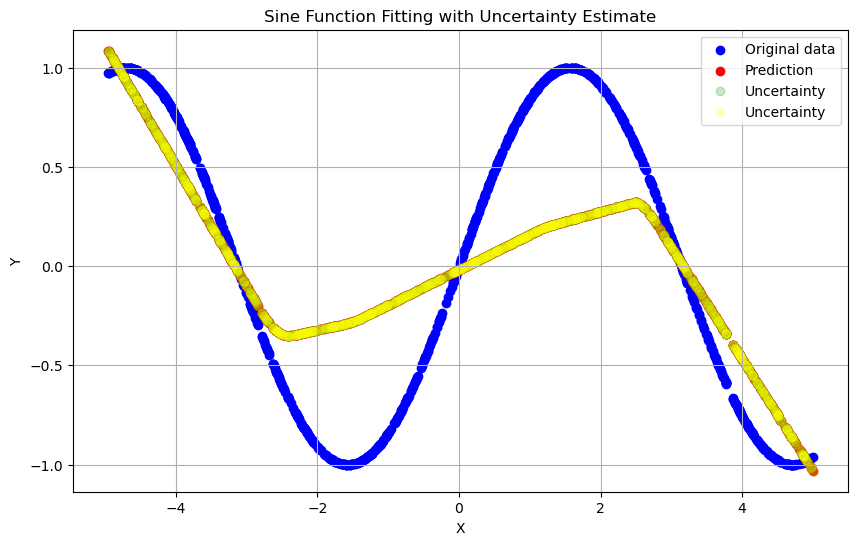

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the neural network
class DropoutNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob):
        super(DropoutNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_prob)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Define the function to fit (sine function)
def sine_function(x):
    return np.sin(x)

# Generate data
torch.manual_seed(42)
np.random.seed(42)
X_train = np.random.uniform(-5, 5, 1000).reshape(-1, 1).astype(np.float32)
y_train = sine_function(X_train)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)

# Instantiate the model, loss function, and optimizer
input_size = 1
hidden_size = 100
output_size = 1
dropout_prob = 0.8
model = DropoutNet(input_size, hidden_size, output_size, dropout_prob)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 2000
model.train()
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Prediction
model.eval()
with torch.no_grad():
    outputs = torch.cat([model(X_train) for _ in range(100)], dim=1)
    mean_prediction = outputs.mean(dim=1).numpy()
    std_prediction = outputs.std(dim=1).numpy()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_train.numpy(), y_train.numpy(), color='blue', label='Original data')
plt.scatter(X_train.numpy(), mean_prediction, color='red', label='Prediction')
plt.scatter(X_train.numpy().flatten(), mean_prediction - 2 * std_prediction, color='green', alpha=0.2, label='Uncertainty')
plt.scatter(X_train.numpy().flatten(), mean_prediction + 2 * std_prediction, color='yellow', alpha=0.2, label='Uncertainty')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sine Function Fitting with Uncertainty Estimate')
plt.legend()
plt.grid(True)
plt.show()

Epoch [100/2000], Loss: 0.0822
Epoch [200/2000], Loss: 0.0735
Epoch [300/2000], Loss: 0.0691
Epoch [400/2000], Loss: 0.0652
Epoch [500/2000], Loss: 0.0643
Epoch [600/2000], Loss: 0.0630
Epoch [700/2000], Loss: 0.0590
Epoch [800/2000], Loss: 0.0627
Epoch [900/2000], Loss: 0.0610
Epoch [1000/2000], Loss: 0.0617
Epoch [1100/2000], Loss: 0.0606
Epoch [1200/2000], Loss: 0.0609
Epoch [1300/2000], Loss: 0.0638
Epoch [1400/2000], Loss: 0.0654
Epoch [1500/2000], Loss: 0.0598
Epoch [1600/2000], Loss: 0.0635
Epoch [1700/2000], Loss: 0.0659
Epoch [1800/2000], Loss: 0.0562
Epoch [1900/2000], Loss: 0.0610
Epoch [2000/2000], Loss: 0.0678


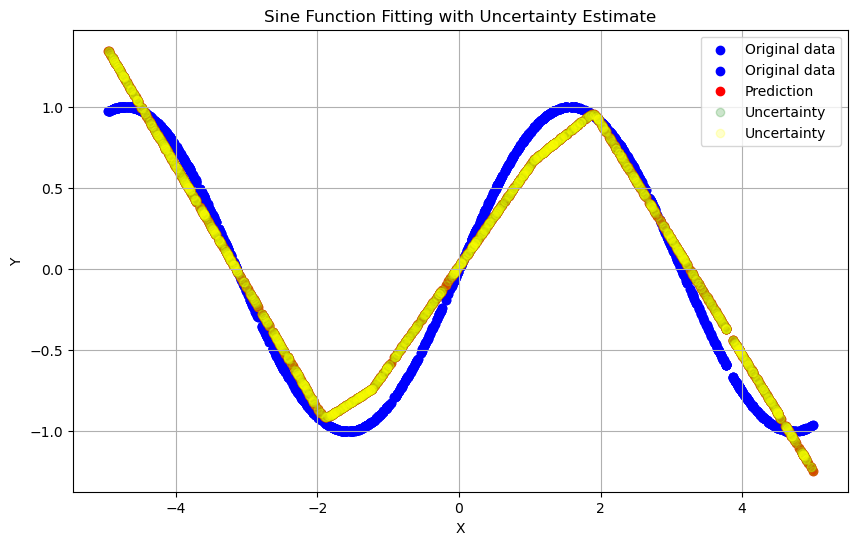

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the neural network
class DropoutNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob):
        super(DropoutNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_prob)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Define the function to fit (sine function)
def sine_function(x):
    return np.sin(x)

# Generate data
torch.manual_seed(42)
np.random.seed(42)
X_train = np.random.uniform(-5, 5, 1000).reshape(-1, 1).astype(np.float32)
y_train = sine_function(X_train)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)

# Instantiate the model, loss function, and optimizer
input_size = 1
hidden_size = 100
output_size = 1
dropout_prob = 0.2
model = DropoutNet(input_size, hidden_size, output_size, dropout_prob)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 2000
model.train()
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Prediction
model.eval()
with torch.no_grad():
    outputs = torch.cat([model(X_train) for _ in range(100)], dim=1)
    mean_prediction = outputs.mean(dim=1).numpy()
    std_prediction = outputs.std(dim=1).numpy()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_train.numpy(), y_train.numpy(), color='blue', label='Original data')
plt.scatter(X_train.numpy(), y_train.numpy(), color='blue', label='Original data')
plt.scatter(X_train.numpy(), mean_prediction, color='red', label='Prediction')
plt.scatter(X_train.numpy().flatten(), mean_prediction - 2 * std_prediction, color='green', alpha=0.2, label='Uncertainty')
plt.scatter(X_train.numpy().flatten(), mean_prediction + 2 * std_prediction, color='yellow', alpha=0.2, label='Uncertainty')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sine Function Fitting with Uncertainty Estimate')
plt.legend()
plt.grid(True)
plt.show()

Epoch [100/2000], Loss: 0.0822
Epoch [200/2000], Loss: 0.0735
Epoch [300/2000], Loss: 0.0691
Epoch [400/2000], Loss: 0.0652
Epoch [500/2000], Loss: 0.0643
Epoch [600/2000], Loss: 0.0630
Epoch [700/2000], Loss: 0.0590
Epoch [800/2000], Loss: 0.0627
Epoch [900/2000], Loss: 0.0610
Epoch [1000/2000], Loss: 0.0617
Epoch [1100/2000], Loss: 0.0606
Epoch [1200/2000], Loss: 0.0609
Epoch [1300/2000], Loss: 0.0638
Epoch [1400/2000], Loss: 0.0654
Epoch [1500/2000], Loss: 0.0598
Epoch [1600/2000], Loss: 0.0635
Epoch [1700/2000], Loss: 0.0659
Epoch [1800/2000], Loss: 0.0562
Epoch [1900/2000], Loss: 0.0610
Epoch [2000/2000], Loss: 0.0678


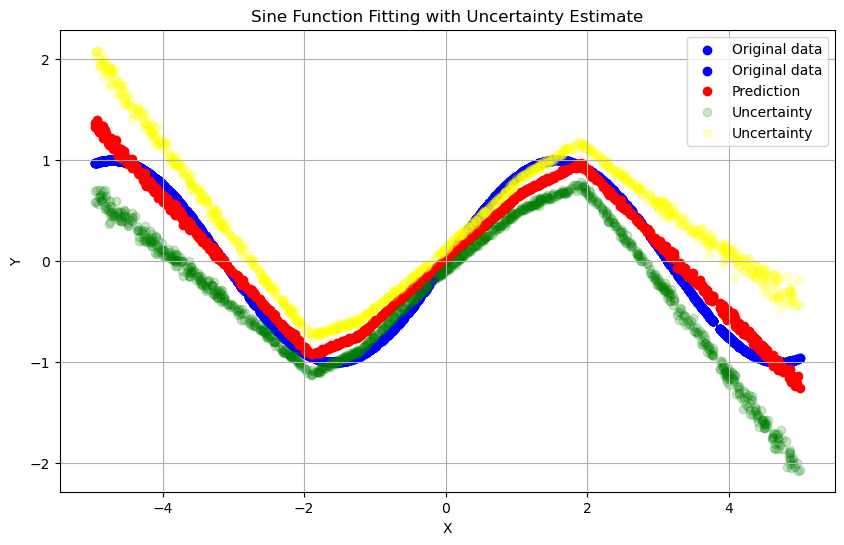

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the neural network
class DropoutNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob):
        super(DropoutNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_prob)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Define the function to fit (sine function)
def sine_function(x):
    return np.sin(x)

# Generate data
torch.manual_seed(42)
np.random.seed(42)
X_train = np.random.uniform(-5, 5, 1000).reshape(-1, 1).astype(np.float32)
y_train = sine_function(X_train)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)

# Instantiate the model, loss function, and optimizer
input_size = 1
hidden_size = 100
output_size = 1
dropout_prob = 0.2
model = DropoutNet(input_size, hidden_size, output_size, dropout_prob)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 2000
model.train()
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Prediction
model.train()  # Set to training mode to enable dropout during inference
with torch.no_grad():
    outputs = torch.cat([model(X_train) for _ in range(100)], dim=1)
    mean_prediction = outputs.mean(dim=1).numpy()
    std_prediction = outputs.std(dim=1).numpy()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_train.numpy(), y_train.numpy(), color='blue', label='Original data')
plt.scatter(X_train.numpy(), y_train.numpy(), color='blue', label='Original data')
plt.scatter(X_train.numpy(), mean_prediction, color='red', label='Prediction')
plt.scatter(X_train.numpy().flatten(), mean_prediction - 2 * std_prediction, color='green', alpha=0.2, label='Uncertainty')
plt.scatter(X_train.numpy().flatten(), mean_prediction + 2 * std_prediction, color='yellow', alpha=0.2, label='Uncertainty')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sine Function Fitting with Uncertainty Estimate')
plt.legend()
plt.grid(True)
plt.show()

Epoch [100/2000], Loss: 0.0508
Epoch [200/2000], Loss: 0.0269
Epoch [300/2000], Loss: 0.0211
Epoch [400/2000], Loss: 0.0134
Epoch [500/2000], Loss: 0.0123
Epoch [600/2000], Loss: 0.0093
Epoch [700/2000], Loss: 0.0080
Epoch [800/2000], Loss: 0.0087
Epoch [900/2000], Loss: 0.0241
Epoch [1000/2000], Loss: 0.0077
Epoch [1100/2000], Loss: 0.0106
Epoch [1200/2000], Loss: 0.0071
Epoch [1300/2000], Loss: 0.0065
Epoch [1400/2000], Loss: 0.0149
Epoch [1500/2000], Loss: 0.0082
Epoch [1600/2000], Loss: 0.0063
Epoch [1700/2000], Loss: 0.0169
Epoch [1800/2000], Loss: 0.0059
Epoch [1900/2000], Loss: 0.0210
Epoch [2000/2000], Loss: 0.0114


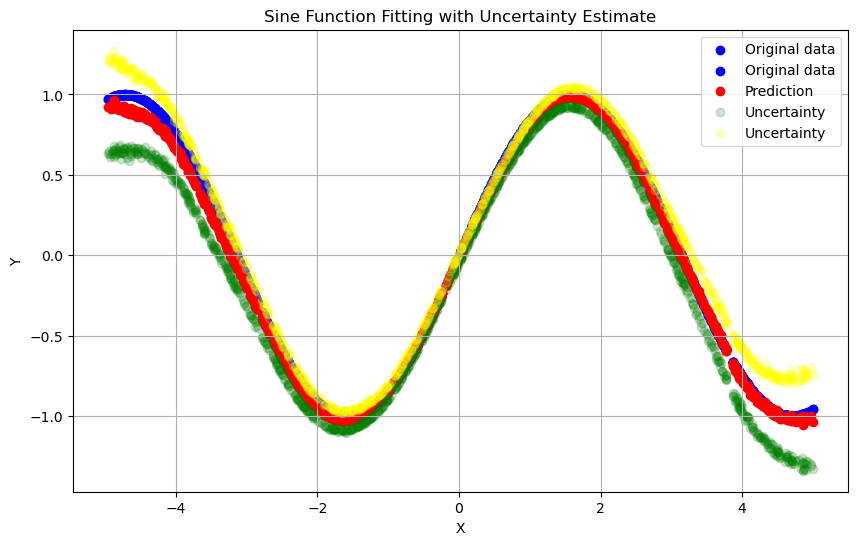

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the neural network
class DropoutNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_prob):
        super(DropoutNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_prob)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Define the function to fit (sine function)
def sine_function(x):
    return np.sin(x)

# Generate data
torch.manual_seed(42)
np.random.seed(42)
X_train = np.random.uniform(-5, 5, 1000).reshape(-1, 1).astype(np.float32)
y_train = sine_function(X_train)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)

# Instantiate the model, loss function, and optimizer
input_size = 1
hidden_size = 1009
output_size = 1
dropout_prob = 0.1
model = DropoutNet(input_size, hidden_size, output_size, dropout_prob)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 2000
model.train()
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Prediction
model.train()  # Set to training mode to enable dropout during inference
with torch.no_grad():
    outputs = torch.cat([model(X_train) for _ in range(100)], dim=1)
    mean_prediction = outputs.mean(dim=1).numpy()
    std_prediction = outputs.std(dim=1).numpy()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_train.numpy(), y_train.numpy(), color='blue', label='Original data')
plt.scatter(X_train.numpy(), y_train.numpy(), color='blue', label='Original data')
plt.scatter(X_train.numpy(), mean_prediction, color='red', label='Prediction')
plt.scatter(X_train.numpy().flatten(), mean_prediction - 2 * std_prediction, color='green', alpha=0.2, label='Uncertainty')
plt.scatter(X_train.numpy().flatten(), mean_prediction + 2 * std_prediction, color='yellow', alpha=0.2, label='Uncertainty')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sine Function Fitting with Uncertainty Estimate')
plt.legend()
plt.grid(True)
plt.show()